In [21]:
import pandas as pd
import sweetviz
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Lectura e informacion de los datos**
---

In [3]:
data=pd.read_csv('../../Data/bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,1,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,0,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   car         49643 non-null  object
 9   contact     49732 non-null  object
 10  day         49732 non-null  int64 
 11  month       49732 non-null  object
 12  duration    49732 non-null  int64 
 13  campaign    49732 non-null  int64 
 14  pdays       49732 non-null  int64 
 15  previous    49732 non-null  int64 
 16  poutcome    49732 non-null  object
 17  subscribed  49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.8+ MB


**Exploracion de datos nulos**
---

In [5]:
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
car           89
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
subscribed     0
dtype: int64

**Reporte con Sweetviz**
---

In [6]:
report=sweetviz.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Correlacion entre las columnas numéricas**
---

<Axes: >

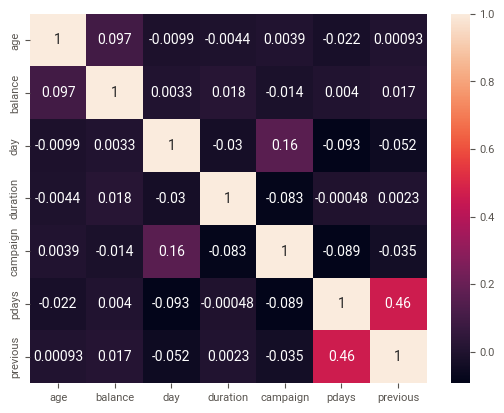

In [7]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)

# Análisis estadístico de los datos


In [8]:
display(data)

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,1,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,1,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,1,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,1,cellular,6,feb,129,4,211,3,other,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   car         49643 non-null  object
 9   contact     49732 non-null  object
 10  day         49732 non-null  int64 
 11  month       49732 non-null  object
 12  duration    49732 non-null  int64 
 13  campaign    49732 non-null  int64 
 14  pdays       49732 non-null  int64 
 15  previous    49732 non-null  int64 
 16  poutcome    49732 non-null  object
 17  subscribed  49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.8+ MB


In [10]:
print(data.nunique())

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
car              3
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64


## a) Descriptive stactistics

In [12]:
data.shape

(49732, 18)

Estudiemos la estructura y características de la variable objetivo 'subscribed'. Esta puede tomar dos valores 'yes' o 'no'.

In [22]:
data['subscribed'].value_counts()

subscribed
no     43922
yes     5810
Name: count, dtype: int64

In [30]:
data['subscribed'].describe()

count     49732
unique        2
top          no
freq      43922
Name: subscribed, dtype: object

In [31]:
data['subscribed'].unique()

array(['no', 'yes'], dtype=object)

C:\Users\ITZIAR CAMPO\AppData\Local\Temp\ipykernel_9768\1781758354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subscribed',data=data, palette='rainbow')


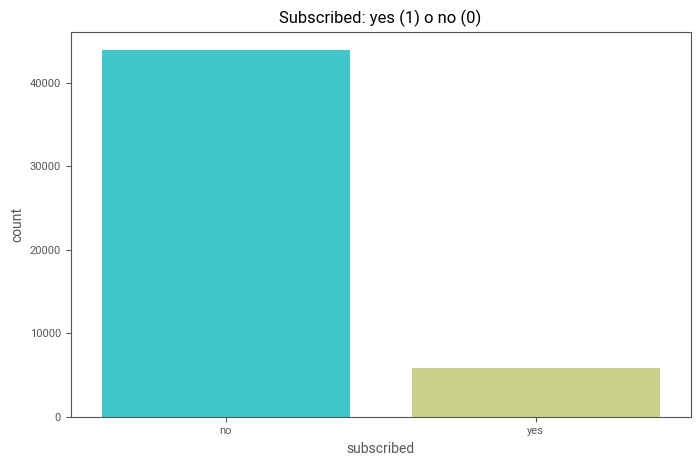

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='subscribed',data=data, palette='rainbow')
plt.title("Subscribed: yes (1) o no (0)")
plt.show()

In [25]:
import plotly.express as ex
fig = ex.pie(data,names='subscribed')
fig.update_layout(title='Proporción de observaciones de cada clase (0, 1)')
fig.show()

La muestra está un poco desbalanceada. Deberemos emplear técncias de oversampling para poder realizar redicciones precisas.

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


En esta descripción sólo aparecen aquellas variables que son numéricas.
Para tratar las categóricas tenemos que hacerlo de forma distinta.


In [26]:
cat=[] #variables categóricas
num=[] #variables numéricas
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'car', 'contact', 'month', 'poutcome', 'subscribed']
num =  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Hacemos un boxplot para analizar gráficamente los valores de las variables numéricas.

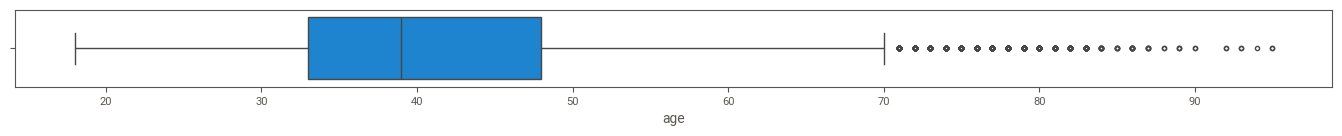

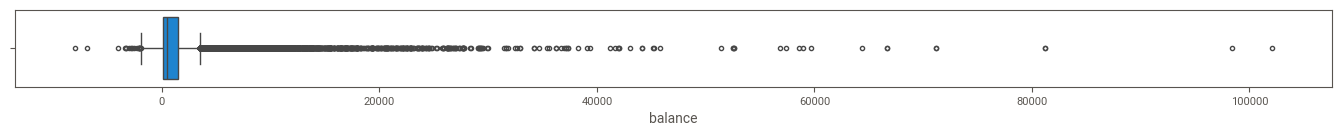

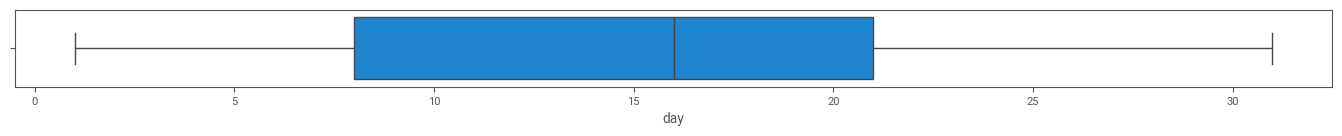

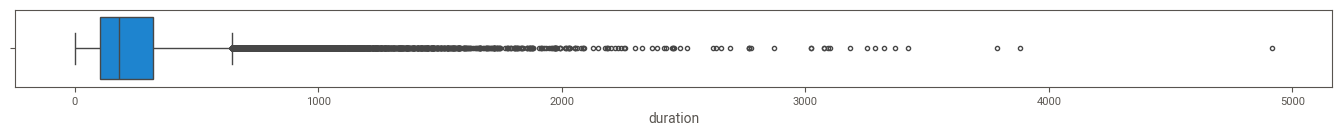

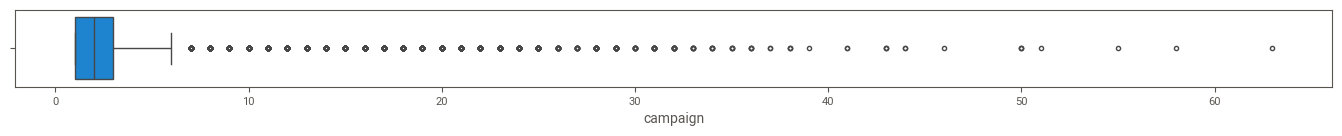

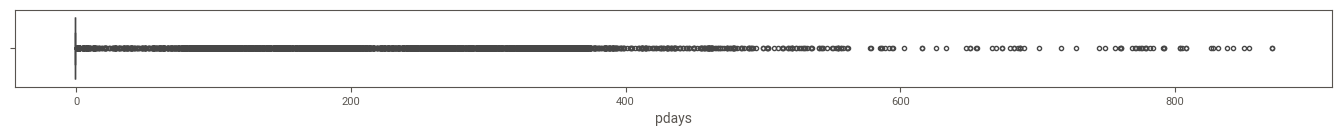

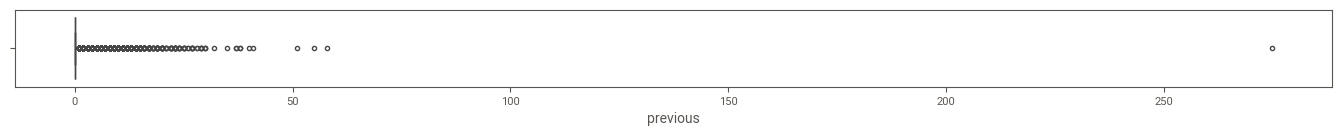

In [27]:
for column in data[num]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data[num], x=column)

Ahora hacemos un análisis descritivo de las variables categóricas de la misma forma que lo hemos hecho para la variable objetivo.

In [32]:
for i in data.columns: # bucle para todas las columnas del dataframe
    if data[i].dtypes == 'object': #condición que debe cumplirse (que sean del tipo 'object')
        print(i)
        print()
        print('Categorías:')
        print(data[i].value_counts())
        print(data[i].describe())
        print(data[i].nunique())
        print()
        print()

job

Categorías:
job
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: count, dtype: int64
count           49732
unique             12
top       blue-collar
freq            10678
Name: job, dtype: object
12


marital

Categorías:
marital
married     30011
single      13986
divorced     5735
Name: count, dtype: int64
count       49732
unique          3
top       married
freq        30011
Name: marital, dtype: object
3


education

Categorías:
education
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: count, dtype: int64
count         49732
unique            4
top       secondary
freq          25508
Name: education, dtype: object
4


default

Categorías:
default
no     48841
yes      891
Name: count, dtype: int64
count     4973

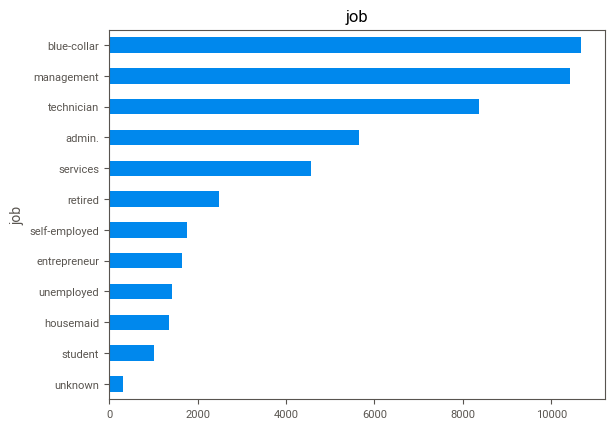

job
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: count, dtype: int64


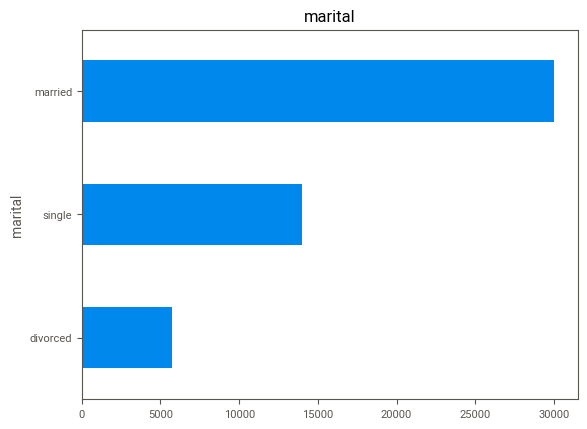

marital
married     30011
single      13986
divorced     5735
Name: count, dtype: int64


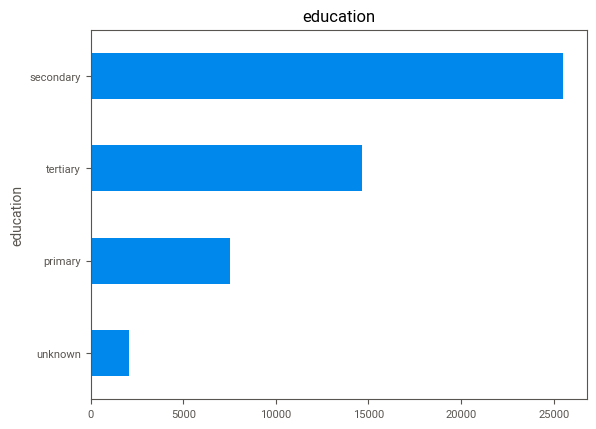

education
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: count, dtype: int64


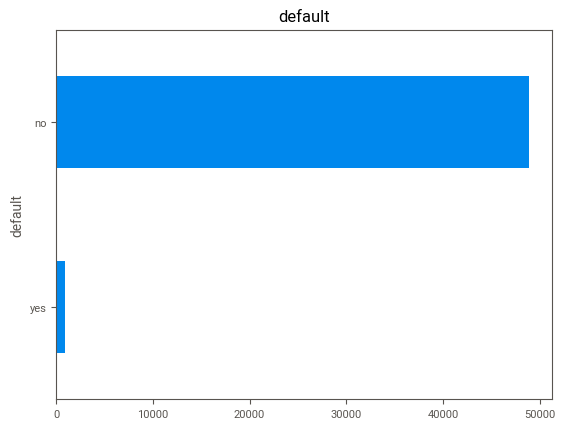

default
no     48841
yes      891
Name: count, dtype: int64


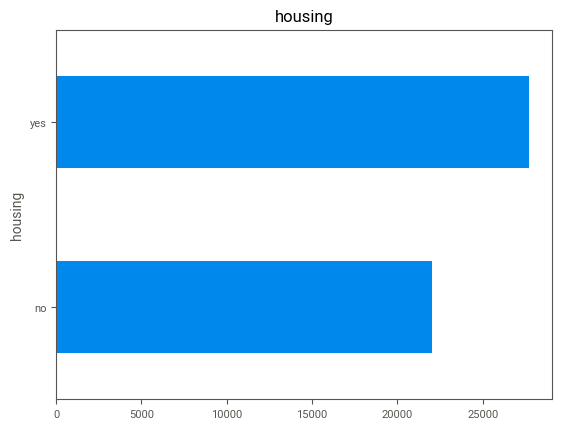

housing
yes    27689
no     22043
Name: count, dtype: int64


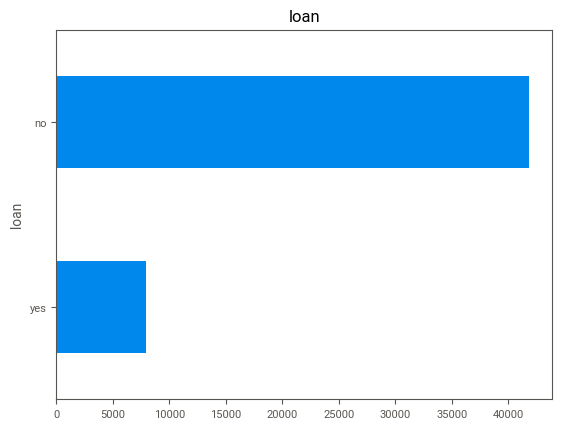

loan
no     41797
yes     7935
Name: count, dtype: int64


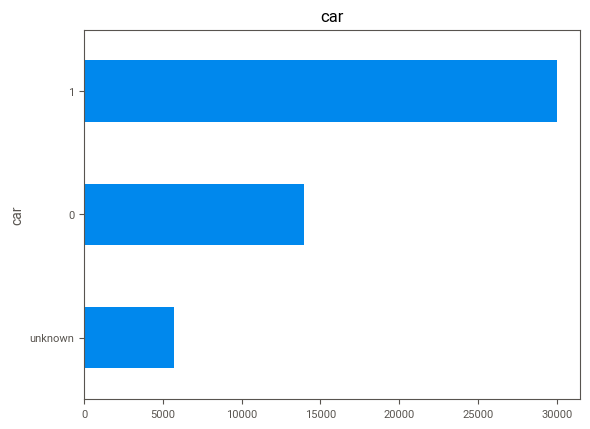

car
1          29982
0          13946
unknown     5715
Name: count, dtype: int64


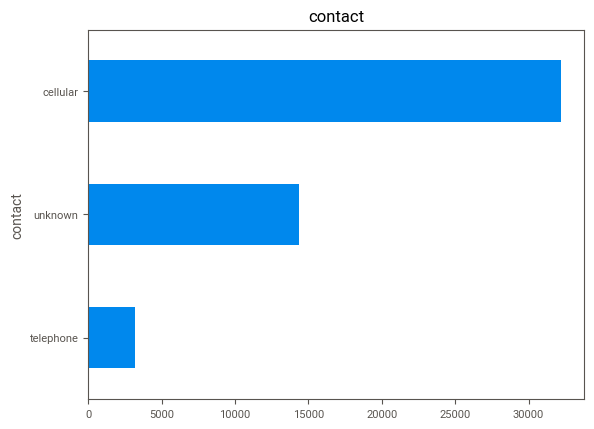

contact
cellular     32181
unknown      14344
telephone     3207
Name: count, dtype: int64


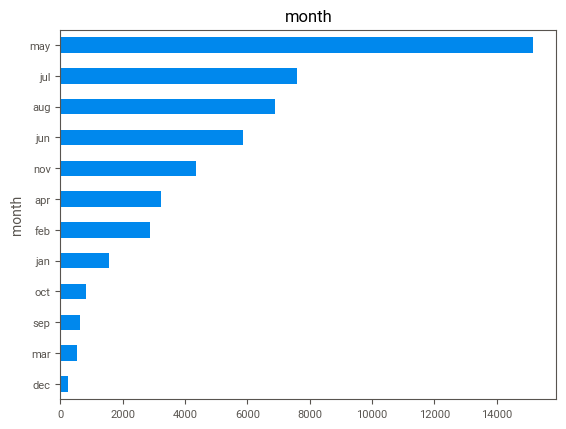

month
may    15164
jul     7601
aug     6880
jun     5872
nov     4359
apr     3225
feb     2871
jan     1551
oct      818
sep      631
mar      526
dec      234
Name: count, dtype: int64


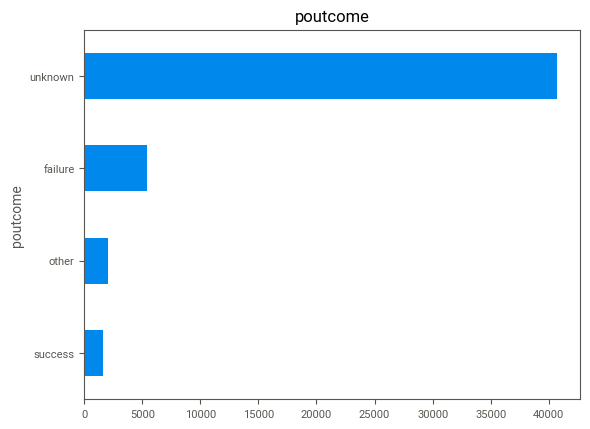

poutcome
unknown    40664
failure     5391
other       2037
success     1640
Name: count, dtype: int64


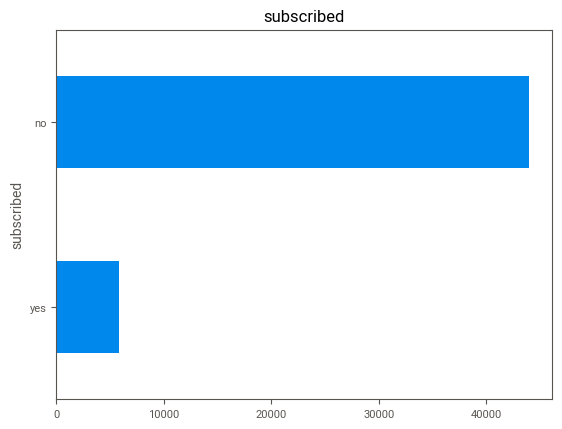

subscribed
no     43922
yes     5810
Name: count, dtype: int64


In [35]:
for i in data.columns: # bucle para todas las columnas del dataframe
    if data[i].dtypes == 'object': #condición que debe cumplirse (que sean del tipo 'object')
        data[i].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
        plt.title(i)
        plt.show()
        print(data[i].value_counts().head(20))

Separamos las variables predictoras de la variable objetivo.

In [29]:
X = data[list(data.columns[1:data.shape[1]])] #todas las variables menos la variable respuesta
y = data['subscribed']